# **Convolutional Neural Networks (CNN)**
In this case, we will use a CNN with a dataset called **“CIFAR-10”** where we have a total of **60 000 images** of 10 different class types (dogs, cats, airplanes, horses...). We will reserve **50,000 images to train** our CNN and **10,000 to test** and evaluate if it really has good accuracy.

# **Load the library**

In [20]:
# In this case we use Numpy, TensorFLow, Matplotlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
%matplotlib inline

# **Load our dataset and display it**

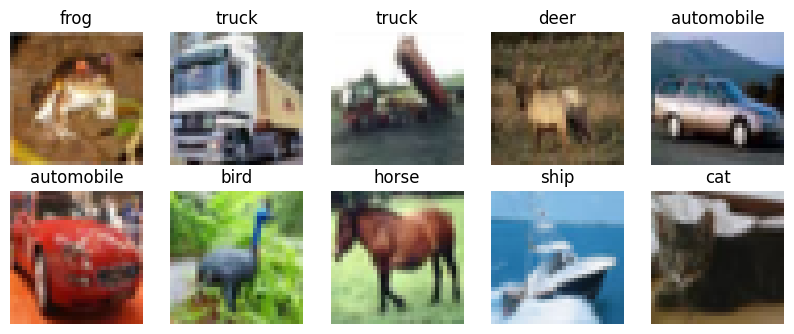

In [12]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5, 5, i +1)
  plt.imshow(X_train[i], cmap = 'gray')
  plt.title(class_names[y_train[i][0]])
  plt.axis("off")
  plt.show


# **Normalize the data**

In [13]:
# Thanks to the normalization of the data, the image goes from 0 to 255 pixels to normalize it from 0 to 1 pixel.
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Creating our CNN**

- We use **Conv2D** which applies filters on the training image to extract features (edges, patterns, textures...).

- **MaxPooling2D** maintains the important features, and helps us both to reduce computation time and to control overfitting.

- **Flatten** flattens all the outputs generated by the previous layers into a one-dimensional vector, thanks to this, we can pass them to a Dense layer.

In [14]:
model = Sequential(
    [
# 32 = Number of filters | (3,3) = Filter size | padding='same' = We keep the size of the images
# input_shape = Pixel values of the training images

      Conv2D(16, (3, 3), padding='same', input_shape = (32, 32, 3)), # In Conv2D, the number of filters is is increasing until it reaches the last layer, as it will recognize more complex patterns.
      BatchNormalization(), # For each layer, Batch normalization helps us to normalize the output.
      Activation('relu'),

      Conv2D(32, (3, 3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D((2, 2)), # Used after one or several convolutions
      Dropout(0.5),

      Conv2D(64, (3, 3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.3), # To avoid overfitting

      Conv2D(128, (3, 3), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D((2, 2)),
      Dropout(0.4),

      Flatten(),

      Dense(256),
      BatchNormalization(),
      Activation('relu'),

      Dense(128),
      BatchNormalization(),
      Activation('relu'),
      Dropout(0.3),

      Dense(64, activation = 'relu'),

      Dense(10, activation = 'softmax')
    ], name = "model"
)
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 666,282 (2.54 MB)

 Trainable params: 665,034 (2.54 MB)

 Non-trainable params: 1,248 (4.88 KB)

# **Early Stop**

It is advisable to add **Early Stop** to our CNN model, as this way we will know when our model has stopped improving, once it has stopped, we will add **restore_best_weights**, so that the weights of the best epoch are saved.

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(
    patience= 5, # If it does not improve in 13 epochs, stop
    restore_best_weights= True
)

# **Compiling our CNN**

There is **overfitting** if:

**val_accuracy** goes down or stagnates while accuracy keeps going up.

**val_loss** goes up while loss goes down.

**No overfitting** (ideal):

**val_accuracy** goes up along with accuracy.

**val_loss** goes down along with loss.

In [16]:
model.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(), # 10 classes ---> Categorical
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)
model.fit(
    X_train, y_train,
    epochs = 60,
    validation_split = 0.2,
    shuffle = True, # When using a dataset directly imported from tf.keras, we have to set it to True
    callbacks=[early_stop]

)

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 155ms/step - accuracy: 0.3270 - loss: 1.8416 - val_accuracy: 0.4433 - val_loss: 1.5787
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 197s 158ms/step - accuracy: 0.5033 - loss: 1.3686 - val_accuracy: 0.4547 - val_loss: 1.6680
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 192s 149ms/step - accuracy: 0.5897 - loss: 1.1584 - val_accuracy: 0.5345 - val_loss: 1.3821
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 198s 158ms/step - accuracy: 0.6355 - loss: 1.0315 - val_accuracy: 0.6830 - val_loss: 0.8939
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 187s 150ms/step - accuracy: 0.6565 - loss: 0.9702 - val_accuracy: 0.6868 - val_loss: 0.8761
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.6782 - loss: 0.9070 - val_accuracy: 0.6911 - val_loss: 0.8772
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 186s 149ms/step - accuracy: 0.6960 - loss: 0.8642 - val_accuracy: 0.6748 - val_loss: 0.9129
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 150ms/step - ac

# **Is there overfitting in our CNN?**

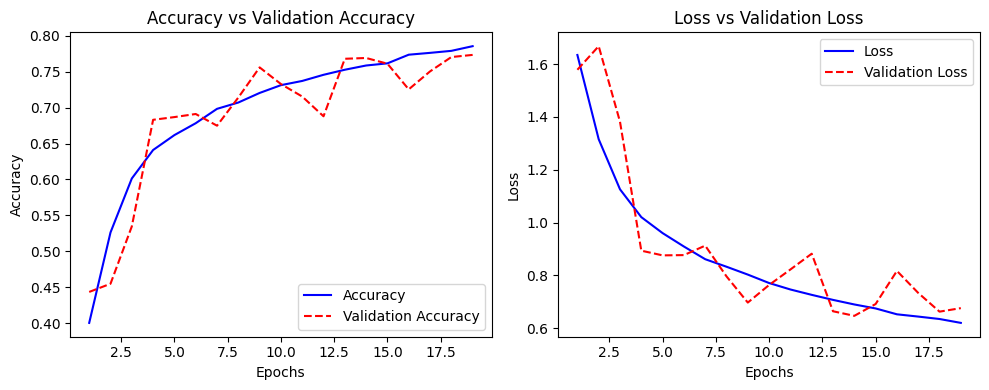

In [17]:
history = model.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Accuracy graphic
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graphic
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Evaluating in our test images**

If we are not satisfied with our results, we can change the architecture of our CNN as many times as necessary, then recompile it, and test it again with the 10,000 test images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

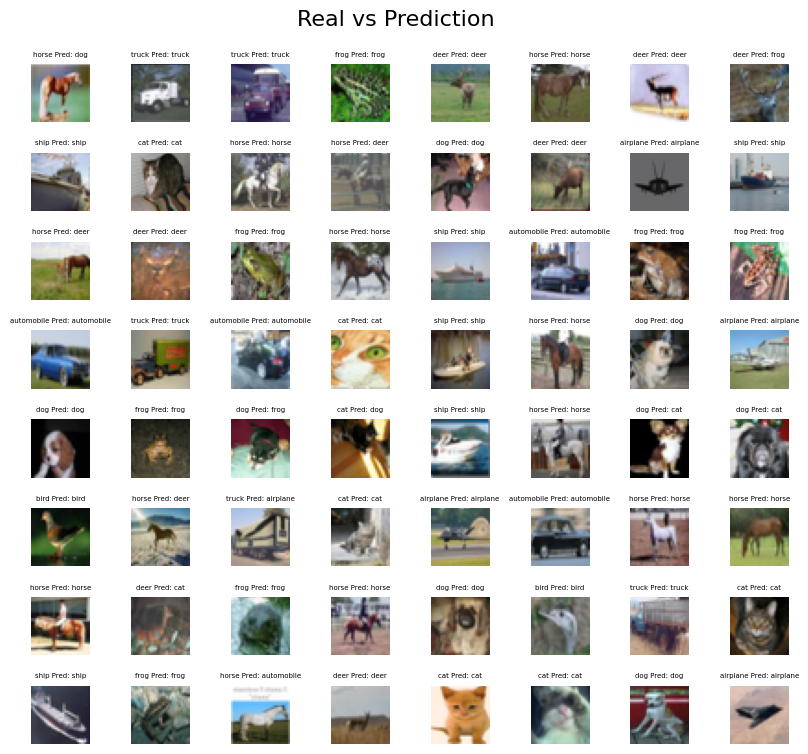

In [19]:
m = X_test.shape[0]  # Number of test images

fig, axes = plt.subplots(8, 8, figsize=(8, 8)) # We are displaying 8 x 8 = 64 images
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    image = X_test[random_index]
    ax.imshow(image)

    image_reshaped = image.reshape(1, 32, 32, 3) # 1 image, 32 pixels, 32 pixels, 3 RGB
    prediction = model.predict(image_reshaped)  # Our prediction
    yhat = np.argmax(prediction)  # Class index with the highest probability

    ax.set_title(f"{class_names[y_test[random_index][0]]} Pred: {class_names[yhat]}", fontsize=5)
    ax.set_axis_off()

fig.suptitle("Real vs Prediction", fontsize=16)
plt.show()



# **Evaluating our model**

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7630 - loss: 0.6751
Test accuracy: 0.76, Test loss: 0.68


# **Testing with real images**

Once we have trained our model with a solid prediction, we can test it with real images (remember that they have to be the same size as the training images, remember that the size is 32x32 pixels).

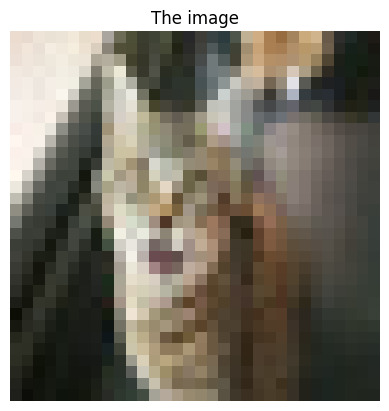

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction class: cat


In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/Image8.jpg' # Make sure you copy the exact location of your image

# Load our image
img = image.load_img(img_path, target_size=(32, 32))

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("The image")
plt.show()

# Normalize
img_array = image.img_to_array(img) / 255.0

# Batch dimension
img_array = np.expand_dims(img_array, axis=0)

# Prediction
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Show the results
print(f"Prediction class: {class_names[predicted_class]}")